In [1]:
import numpy as np
from matplotlib import pyplot as plt
from active_gel import *

In [2]:
def jacobian(m, k): 
    eta = m.eta0 + m.eta1 
    f = eta*k*k + m.gamma 
    M11 = - m.xi*k*k/f - (m.k+k*k)
    M12 = - m.zeta*k*k/f 
    M21 = m.b1/2*m.xi*k*k/f 
    M22 = m.b1/2*(m.zeta*k*k)/f - (m.chi + m.kappa*k*k)/m.b2
    return np.stack([M11, M12, M21, M22], axis=-1)

In [16]:
b1 = 1 # nematic coupling to velocity 
b2 = 15 # motility/diffusion constant 
chi = 0.5 # parameter of the free energy 
kappa = 1  # parameter of the free energy 
etas = [1, 0] # eta0: viscosity, eta1: compressibility (compressibility doesn't matter in 1D)
k = 0.1 # density decay rate 
gamma = 0.1 # friction 
source = 0

n = 100

xis = np.linspace(-5, 5, n)
zetas = np.linspace(-2, 2, n)

N = 100
ks = np.linspace(0, 2, N)

max_eigvals = [] 
max_ns = [] 

for xi in xis: 
    for zeta in zetas: 
        m = ActiveGel(b1, b2, chi, kappa, etas, xi, zeta, k, gamma, source)
        J = jacobian(m, ks)
        J = J.reshape((N, 2, 2))
        eigval, eigvec = np.linalg.eig(J)
        max_n, index = np.unravel_index(np.argmax(eigval, axis=None), eigval.shape)
        max_eigval = np.max(eigval)
        max_eigvals.append(max_eigval)
        max_ns.append(max_n)
        
max_eigvals = np.reshape(max_eigvals, (n, n))
max_ns = np.reshape(max_ns, (n, n))

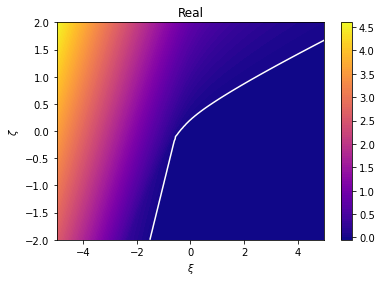

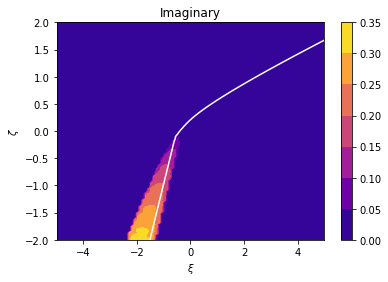

In [18]:
plt.contourf(xis, zetas, max_eigvals.real.T, levels=100, cmap='plasma')
plt.colorbar()
plt.contour(xis, zetas, max_eigvals.real.T, levels=[0], cmap='Greys')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\zeta$')
plt.title('Real')
plt.show()

plt.contourf(xis, zetas, max_eigvals.imag.T, cmap='plasma')
plt.colorbar()
plt.contour(xis, zetas, max_eigvals.real.T, levels=[0], cmap='Greys')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\zeta$')
plt.title('Imaginary')
plt.show()

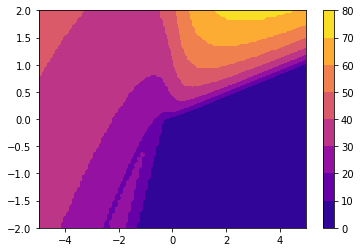

In [19]:
plt.contourf(xis, zetas, max_ns.T, cmap='plasma')
plt.colorbar()

In [20]:
def jacobian2(m, kx, ky): 
    eta = m.eta0 + m.eta1 
    k1 = kx**2+ky**2
    k2 = kx**2-ky**2 
    k3 = kx*ky*2 
    f = eta*k1 + m.gamma     
    M11 = - m.xi*k1/f - (m.k+k1)
    M12 = - m.zeta*k2/f 
    M21 = m.b1/2*m.xi*k2/f
    M22 = m.b1/2*(m.zeta*k1)/f - (m.chi + m.kappa*k1)/m.b2
    M13 = - m.zeta*k3/f 
    M31 = m.b1/2*m.xi*k3/f 
    M33 = m.b1/2*m.zeta*k1/f - (m.chi + m.kappa*k1)/m.b2
    zeros = np.zeros_like(M11)
    return np.stack([M11, M12, M13, M21, M22, zeros, M31, zeros, M33], axis=-1)

In [22]:
b1 = 1 # nematic coupling to velocity 
b2 = 15 # motility/diffusion constant 
chi = 0.5 # parameter of the free energy 
kappa = 1  # parameter of the free energy 
etas = [1, 0] # eta0: viscosity, eta1: compressibility (compressibility doesn't matter in 1D)
k = 0.1 # density decay rate 
gamma = 0.1 # friction 
source = 0

xis = np.linspace(-5, 5, 50)
zetas = np.linspace(-2, 2, 50)

N = 100
ks = np.linspace(-2, 2, N)
kx, ky = np.meshgrid(ks, ks)

max_eigvals = [] 
max_ns = [] 

for xi in xis: 
    for zeta in zetas: 
        m = ActiveGel2D(b1, b2, chi, kappa, etas, xi, zeta, k, gamma, source)
        J = jacobian2(m, kx, ky)
        J = J.reshape((N, N, 3, 3))
        eigval, eigvec = np.linalg.eig(J)
        max_nx, max_ny, index = np.unravel_index(np.argmax(eigval, axis=None), eigval.shape)
        max_eigval = np.max(eigval)
        max_eigvals.append(max_eigval)
        max_ns.append([max_nx, max_ny])
        
max_eigvals = np.reshape(max_eigvals, (50, 50))
max_ns = np.reshape(max_ns, (50, 50, 2))

In [ ]:
plt.contourf(xis, zetas, max_eigvals.real.T, levels=100, cmap='plasma')
plt.colorbar()
plt.contour(xis, zetas, max_eigvals.real.T, levels=[0], cmap='Greys')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\zeta$')
plt.title('Real')
plt.show()

plt.contourf(xis, zetas, max_eigvals.imag.T, cmap='plasma')
plt.colorbar()
plt.contour(xis, zetas, max_eigvals.real.T, levels=[0], cmap='Greys')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\zeta$')
plt.title('Imaginary')
plt.show()